# Enoncé

Tester les codes vus en cours (dans les Numerical Tours, en particulier Ridge et/ou Lasso et/ou multilayer perceptron et/ou SGD) sur votre propre jeu de données, pour un problème de régression ou de classification. 
Ecrire un petit rapport résumant vos observations sur les résultats obtenus, en prenant un soin particulier pour le choix des paramètres (typiquement par validation croisée).

# Chargement des librairies et des données

In [1]:
# coding: utf-8
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import metrics
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action='ignore')

seed = 42

In [2]:
#  convert to a column vector
def MakeCol(y): return y.reshape(-1,1)
#  convert to a row vector
def MakeRow(y): return y.reshape(1,-1)
# find non zero/true elements
def find(x): return np.nonzero(x)[0]

Chargement des données (https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) :

In [3]:
names = ['state','county','community','communityname','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','gePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']
raw_data = pd.read_csv('communities.data', delimiter=',', header=None, names=names, na_values='?')
print("Taille du dataframe :", raw_data.shape)
print("Aperçu des premières lignes du dataframe :")
raw_data.head(10)

Taille du dataframe : (1994, 128)
Aperçu des premières lignes du dataframe :


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
5,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
6,44,7.0,41500.0,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.03
7,6,NaN,NaN,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.55
8,21,NaN,NaN,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,NaN,NaN,NaN,NaN,0.00,NaN,0.53
9,29,NaN,NaN,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,NaN,NaN,NaN,NaN,0.00,NaN,0.15


Il semble y avoir de nombreuses valeurs manquantes dans ce dataframe. Regardons combien il y en a par colonnes :

In [4]:
raw_data.isna().sum().sort_values(axis=0, ascending = False).head(30)

LemasSwFTFieldOps       1675
PctPolicAsian           1675
PolicBudgPerPop         1675
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
RacialMatchCommPol      1675
PctPolicMinor           1675
PolicCars               1675
LemasGangUnitDeploy     1675
OfficAssgnDrugUnits     1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
PolicAveOTWorked        1675
NumKindsDrugsSeiz       1675
community               1177
county                  1174
OtherPerCap                1
AsianPerCap                0
PctEmplProfServ            0
HispPerCap                 0
NumUnderPov                0
PctPopUnderPov             0
dtype: int64

In [5]:
raw_data.isna().sum().value_counts()

0       103
1675     22
1177      1
1174      1
1         1
dtype: int64

Nous avons donc 24 colonnes qui présentent de très nombreuses données manquantes et 1 colonne ('OtherPerCap') qui ne présente qu'une donnée manquante. 

Pour faciliter notre étude, nous allons retirer les colonnes qui présentent trop de données manquantes, retirer l'observation pour laquelle il y a 1 donnée manquante dans 'OtherPerCap', et retirer les variables qui ne sont pas numériques (textuelle ou catégorielle) :

In [6]:
data = raw_data[np.logical_not(raw_data['OtherPerCap'].isnull())]
data = data.loc[:,~data.isnull().any()]
data = data.iloc[:,3:] #on retire les variables non numériques
data.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,gePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.00,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.00,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.00,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.00,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.00,0.15


On récupère nos variables explicatives pour la régression, qu'on place dans une matrice X et notre variable expliquée y à part.

In [7]:
X = data.as_matrix(data.columns[:-1])
y_m = data.as_matrix([data.columns[-1]])
y = y_m.flatten()

In [8]:
[n,p] = X.shape
print(n,p)

1993 100


On sépare notre jeu de données en un jeu d'entraintement et un jeu de test :

In [9]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y,
                                    test_size=0.3, # 30% des données dans le jeu de test
                                     random_state = seed
                                    )

On normalise les jeux obtenus :

In [10]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

m_train = y_train.mean()
y_train_std = y_train - m_train
y_test_std = y_test - m_train

# Baseline : régression linéaire classique

Nous allons d'abord réaliser une régression linéaire classique en utilisant numpy :

In [11]:
w = np.linalg.solve(X_train_std.transpose().dot(X_train_std), X_train_std.transpose().dot(y_train_std) )

E = round(np.linalg.norm(X_test_std.dot(w)-y_test_std) / np.linalg.norm(y_test_std) , 4)
print('Relative prediction error: ', E)

# On récupère la MSE :
MSE = round(np.mean((X_test_std.dot(w) - y_test_std) ** 2), 4)
print('MSE :', MSE)

Relative prediction error:  0.585
MSE : 0.0187


In [12]:
w

array([ 0.0221962 , -0.00905409,  0.05105116, -0.02743596, -0.00669745,
        0.00489794,  0.01659488, -0.01109185, -0.03433345,  0.01321999,
       -0.04027297,  0.02094181, -0.04738932, -0.05230443,  0.007429  ,
       -0.02449841, -0.00439708, -0.00578711, -0.02032339,  0.06112228,
        0.01287709, -0.0712345 , -0.00960327, -0.00447556,  0.00332779,
        0.0091981 ,  0.00693063,  0.00245164, -0.04741739, -0.00907978,
        0.00092147,  0.0125845 ,  0.00948139,  0.04020723, -0.01656507,
       -0.00552391,  0.01652253,  0.02184068,  0.09500787,  0.0448169 ,
        0.05011398, -0.12526608, -0.05416897, -0.00679082, -0.03111404,
       -0.01657813, -0.00242027,  0.0093232 , -0.03408731, -0.00299153,
        0.02491438, -0.01129847,  0.00814425,  0.00181772, -0.00940046,
        0.00510532, -0.00197342, -0.0646292 ,  0.13388104, -0.0830374 ,
        0.01056072, -0.02752465,  0.02612518, -0.05365475,  0.13610569,
       -0.00919756, -0.04864942, -0.11735532,  0.05328438,  0.01

Pour vérifier que nos calculs sont exacts, comparons avec une régression linéaire réalisée avec Scikit-learn :

In [13]:
# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train_std, y_train_std)

# On récupère la MSE :
MSE = round(metrics.mean_squared_error(lr.predict(X_test_std), y_test_std), 4)
print('MSE', MSE)

# Erreur relative :
E = round(np.linalg.norm(X_test_std.dot(lr.coef_)-y_test_std) / np.linalg.norm(y_test_std), 4)
print('Relative prediction error: ', E)


MSE 0.0187
Relative prediction error:  0.585


In [14]:
lr.coef_

array([ 0.0221962 , -0.00905409,  0.05105116, -0.02743596, -0.00669745,
        0.00489794,  0.01659488, -0.01109185, -0.03433345,  0.01321999,
       -0.04027297,  0.02094181, -0.04738932, -0.05230443,  0.007429  ,
       -0.02449841, -0.00439708, -0.00578711, -0.02032339,  0.06112228,
        0.01287709, -0.0712345 , -0.00960327, -0.00447556,  0.00332779,
        0.0091981 ,  0.00693063,  0.00245164, -0.04741739, -0.00907978,
        0.00092147,  0.0125845 ,  0.00948139,  0.04020723, -0.01656507,
       -0.00552391,  0.01652253,  0.02184068,  0.09500787,  0.0448169 ,
        0.05011398, -0.12526608, -0.05416897, -0.00679082, -0.03111404,
       -0.01657813, -0.00242027,  0.0093232 , -0.03408731, -0.00299153,
        0.02491438, -0.01129847,  0.00814425,  0.00181772, -0.00940046,
        0.00510532, -0.00197342, -0.0646292 ,  0.13388104, -0.0830374 ,
        0.01056072, -0.02752465,  0.02612518, -0.05365475,  0.13610569,
       -0.00919756, -0.04864942, -0.11735532,  0.05328438,  0.01

Nous obtenons les mêmes erreurs et les mêmes coefficients.

La régression linéaire classique montre déjà de très bons résultats car la MSE est à 0.187 seulement.

# Régulatisation ridge (l2)

In [15]:
n_train, p_train = X_train_std.shape
n_train

1395

On fait la régression linéaire avec la pénalité Lambda :

In [16]:
Lambda = 0.2*np.linalg.norm(X_train_std)**2
w = np.linalg.solve( X_train_std.transpose().dot(X_train_std) + Lambda*np.eye(p), X_train_std.transpose().dot(y_train_std) )
u = np.linalg.solve( X_train_std.dot(X_train_std.transpose()) + Lambda*np.eye(n_train), y_train_std )
w1 = X_train_std.transpose().dot(u)
print( ('Error (should be 0): ' + str( np.linalg.norm(w-w1)/np.linalg.norm(w) ) ) )

Error (should be 0): 1.4436338087403408e-15


Observons l'évolution de l'erreur en fonction de $\lambda$ :

In [17]:
q = 50
lmax = np.linalg.norm(X_train_std,2)**2
lambda_list = lmax*np.linspace(15,1e-3, q)
W = np.zeros( (p,q) )
E = np.zeros( (q,1) )
MSE_lambda = []
for i in np.arange(0,q):
    Lambda = lambda_list[i]
    w = np.linalg.solve( X_train_std.transpose().dot(X_train_std) + Lambda*np.eye(p), X_train_std.transpose().dot(y_train_std) )
    W[:,i] = w.flatten() # bookkeeping
    E[i] = np.linalg.norm(X_test_std.dot(w)-y_test_std) / np.linalg.norm(y_test_std)
    MSE_lambda.append(metrics.mean_squared_error(X_test_std.dot(w), y_test_std))

# find optimal lambda
i = E.argmin()
lambda0 = lambda_list[i]
wRidge = W[:,i]
print( 'Ridge: ', round((E.min()*100), 2), '%' )
print('Erreur E min :', round(E.min(), 4))
print('MSE min :', round(MSE_lambda[i], 4))
print('lambda optimal :', round(lambda0, 2))

Ridge:  58.36 %
Erreur E min : 0.5836
MSE min : 0.0186
lambda optimal : 34.68


Nous avons un tout petit peu ediminué l'erreur grâce à la régularisation Ridge.

Affichage de l'évolution de l'erreur E et de la MSE :

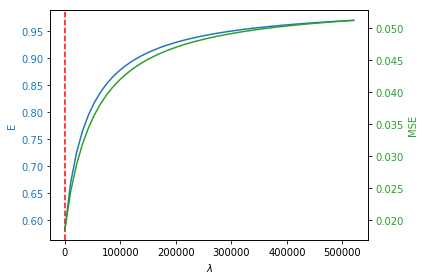

In [18]:
x = lambda_list
y1 = E
y2 = MSE_lambda

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('$\lambda$')
ax1.set_ylabel('E', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('MSE', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.axvline(lambda0, color='red', linestyle='--')
#plt.plot( [lambda0,lambda0], [E.min(), E.max()], 'r--')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Zoom :

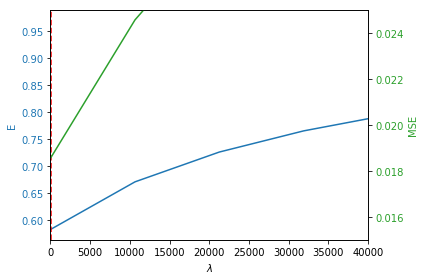

In [19]:
x = lambda_list
y1 = E
y2 = MSE_lambda

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('$\lambda$')
ax1.set_ylabel('E', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('MSE', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.axvline(lambda0, color='red', linestyle='--')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.xlim(0,40000)
plt.ylim(0.015, 0.025)
plt.show()

Affichage du chemin de régularisation, c'est-à-dire l'évolution de 𝑤 en fonction de 𝜆 :

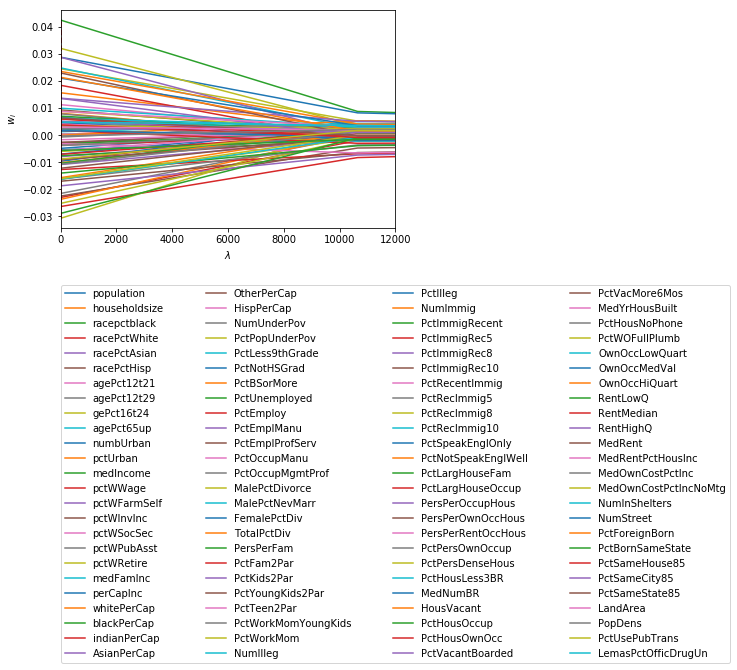

In [20]:
plt.clf
for i in np.arange(0,p):
    plt.plot(lambda_list, W[i,:], label=data.columns[i])
plt.plot( [lambda0,lambda0], [W.flatten().min(), W.flatten().max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda$')
plt.ylabel('$w_i$')
plt.legend(bbox_to_anchor=(0., -2, 2, 0), loc=8,
       ncol=4, mode="expand", borderaxespad=0.)
plt.xlim(0, 12000)

plt.show()

## Avec scikit-learn :

In [21]:
n_lambdas = 200
Lambdas = np.logspace(-5, 5, n_lambdas)

ridge = linear_model.Ridge()

coefs = []
errors = []
for l in Lambdas:
    ridge.set_params(alpha=l)
    ridge.fit(X_train_std, y_train_std)
    coefs.append(ridge.coef_)
    errors.append(metrics.mean_squared_error(ridge.predict(X_test_std), y_test_std))
    
print('MSE min :', round(min(errors), 4))

MSE min : 0.0185


Affichage du chemin de régularisation :

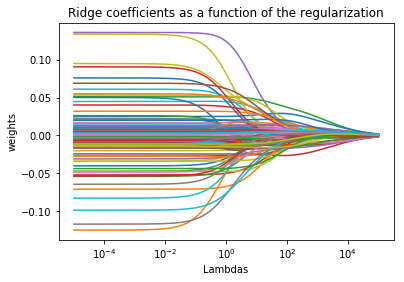

In [22]:
ax = plt.gca()

ax.plot(Lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('Lambdas')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Affichage de l'évolution de la MSE en fonction des Lambdas :

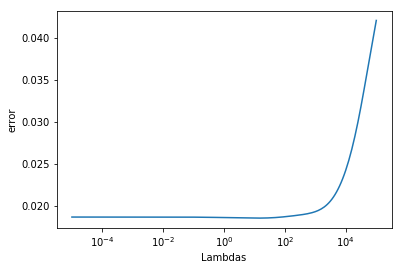

In [23]:
ax = plt.gca()

ax.plot(Lambdas, errors)
ax.set_xscale('log')
plt.xlabel('Lambdas')
plt.ylabel('error')
plt.show()

Zoom :

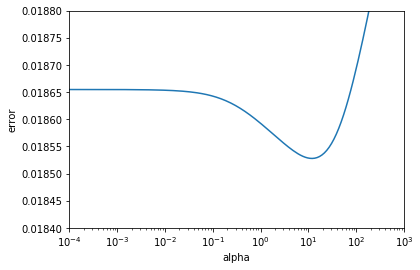

In [24]:
ax = plt.gca()

ax.plot(Lambdas, errors)
ax.set_xscale('log')
plt.ylim(0.0184, 0.0188)
plt.xlim(1e-4, 1e3)
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

Nous obtenons donc un résultat légèrement meilleur que la régression linéaire classique.

Essayons désormais de trouver le meilleur $\lambda$ avec une validation croisée :

In [25]:
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

for train_index, test_index in kf.split(X_train_std):
    print("TRAIN:", "taille", len(train_index), ", 5ers indices", train_index[0:5], 
          "|| TEST:", "taille", len(test_index), ", 5ers indices", test_index[0:5])

TRAIN: taille 1116 , 5ers indices [0 1 2 3 4] || TEST: taille 279 , 5ers indices [23 29 30 31 32]
TRAIN: taille 1116 , 5ers indices [0 1 2 4 6] || TEST: taille 279 , 5ers indices [ 3  5 10 12 39]
TRAIN: taille 1116 , 5ers indices [1 3 4 5 8] || TEST: taille 279 , 5ers indices [0 2 6 7 9]
TRAIN: taille 1116 , 5ers indices [0 1 2 3 5] || TEST: taille 279 , 5ers indices [ 4 11 15 17 18]
TRAIN: taille 1116 , 5ers indices [0 2 3 4 5] || TEST: taille 279 , 5ers indices [ 1  8 13 14 16]


In [26]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha': Lambdas}

# Choisir un score à optimiser, ici la MSE
score = 'neg_mean_squared_error'

# Créer une régression Ridge avec recherche d'hyperparamètre par validation croisée
reg = model_selection.GridSearchCV(linear_model.Ridge(), # régression Ridge
                                    param_grid, # hyperparamètres à tester
                                    cv=kf, # folds pour la validation croisée
                                    scoring=score # score à optimiser
                                    )

# Optimiser la régression sur le jeu d'entraînement
reg.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(reg.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(reg.cv_results_['mean_test_score'], # score moyen
                                reg.cv_results_['std_test_score'], # écart-type du score
                                reg.cv_results_['params'] # valeur de l'hyperparamètre
                                ):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
                                                mean, # score moyen
                                                std * 2, # barre d'erreur
                                                params # hyperparamètre
                                                ))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 121.7382727739662}
Résultats de la validation croisée :
	neg_mean_squared_error = -0.020 (+/-0.005) for {'alpha': 1e-05}
	neg_mean_squared_error = -0.020 (+/-0.005) for {'alpha': 1.1226677735108135e-05}
	neg_mean_squared_error = -0.020 (+/-0.005) for {'alpha': 1.2603829296797274e-05}
	neg_mean_squared_error = -0.020 (+/-0.005) for {'alpha': 1.414991297434576e-05}
	neg_mean_squared_error = -0.020 (+/-0.005) for {'alpha': 1.588565129428053e-05}
	neg_mean_squared_error = -0.020 (+/-0.005) for {'alpha': 1.7834308769319092e-05}
	neg_mean_squared_error = -0.020 (+/-0.005) for {'alpha': 2.0022003718155845e-05}
	neg_mean_squared_error = -0.020 (+/-0.005) for {'alpha': 2.2478058335487252e-05}
	neg_mean_squared_error = -0.020 (+/-0.005) for {'alpha': 2.523539170434766e-05}
	neg_mean_squared_error = -0.020 (+/-0.005) for {'alpha': 2.833096101839324e-05}
	neg_mean_squared_error = -0.020 (+/-0.005) for {'alpha': 3.180625692794119e-0

Nous obtenons une MSE similaire mais un Lambda = 121,74.

# Régularisation Lasso (l1)

Essayons maintenant de réaliser une régularisation l1.

In [27]:
# reshape pour passer d'un format (xxx, ) à un format (xxx, 1)
y_train_std2 = np.array(y_train_std).reshape((y_train_std.size, 1))
y_train_std2.shape

y_test_std2 = np.array(y_test_std).reshape((y_test_std.size, 1))
y_test_std2.shape

C = X_train_std.transpose().dot(X_train_std)
u = X_train_std.transpose().dot(y_train_std)

u2 = np.array(u).reshape((u.size, 1))
u2.shape

def J(w,Lambda): return 1/2*np.linalg.norm(X_train_std.dot(w)-y_train_std2)**2 + Lambda*np.linalg.norm(w,1)
def Soft(x,s): return np.maximum( abs(x)-s, np.zeros(x.shape)  ) * np.sign(x)
def ISTA(w,Lambda,tau): return Soft( w-tau*( C.dot(w)-u2 ), Lambda*tau )

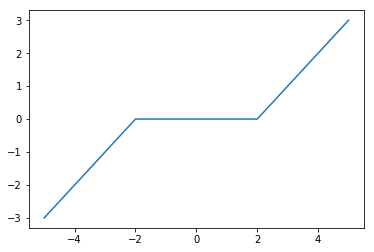

In [28]:
t = np.linspace(-5,5,201)
plt.clf
plt.plot(t,Soft(t,2)) 
plt.axis('tight');

Text(0.5, 1.0, '$log(J(w_k)-min J)$')

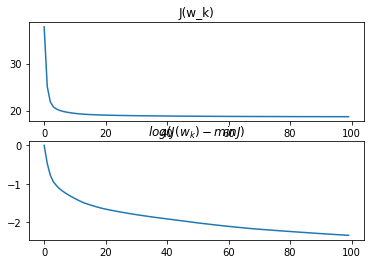

In [29]:
# descent step size
tau = 1.5/np.linalg.norm(X_train_std,2)**2

# paramètre de régularisation
lmax = abs( X_train_std.transpose().dot(y_train_std) ).max()
Lambda = lmax /10

niter = 400
Jlist = np.zeros((niter,1))
w = np.zeros((p,1)) # initialisation w0

for i in np.arange(0,niter):
    Jlist[i] = J(w,Lambda)
    w = ISTA(w,Lambda,tau)
ndisp = int(niter/4)

plt.clf
plt.subplot(2,1,1)
plt.plot(Jlist[0:ndisp])
plt.axis('tight')
plt.title('J(w_k)')
plt.subplot(2,1,2)

e = np.log10( Jlist[0:ndisp]-Jlist.min() +1e-20)

plt.plot(e-e[0])
plt.axis('tight')
plt.title('$log(J(w_k)-min J)$')

Regardons maintenant l'évolution de l'erreur en fonction de $\lambda$

Erreur E min : 25.5988
MSE min : 0.0335
lambda optimal : 143.59


Text(0, 0.5, '$E$')

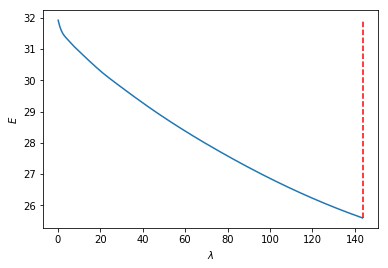

In [30]:
q = 200
lambda_list = lmax*np.linspace(.6,1e-3,q)
W = np.zeros( (p,q) )
E = np.zeros( (q,1) )
w = np.zeros((p,1))
niter = 500
MSE_lambda = []

for iq in np.arange(0,q):
    Lambda = lambda_list[iq]
    # ISTA #
    for i in np.arange(0,niter):
        w = ISTA(w, Lambda, tau)
    W[:,iq] = w.flatten() # bookkeeping
    E[iq] = np.linalg.norm(X_test_std.dot(w) - y_test_std) / np.linalg.norm(y_test_std)
    MSE_lambda.append(metrics.mean_squared_error(X_test_std.dot(w), y_test_std))
    
# find optimal Lambda
i = E.argmin()
lambda0 = lambda_list[i]
wSparse = W[:,i]

print('Erreur E min :', round(E.min(), 4))
print('MSE min :', round(MSE_lambda[i], 4))
print('lambda optimal :', round(lambda0, 2))

# Display error evolution.
plt.clf
plt.plot(lambda_list, E)
plt.plot( [lambda0,lambda0], [E.min(),E.max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda$')
plt.ylabel('$E$')

Affichage du chemin de régularisation :

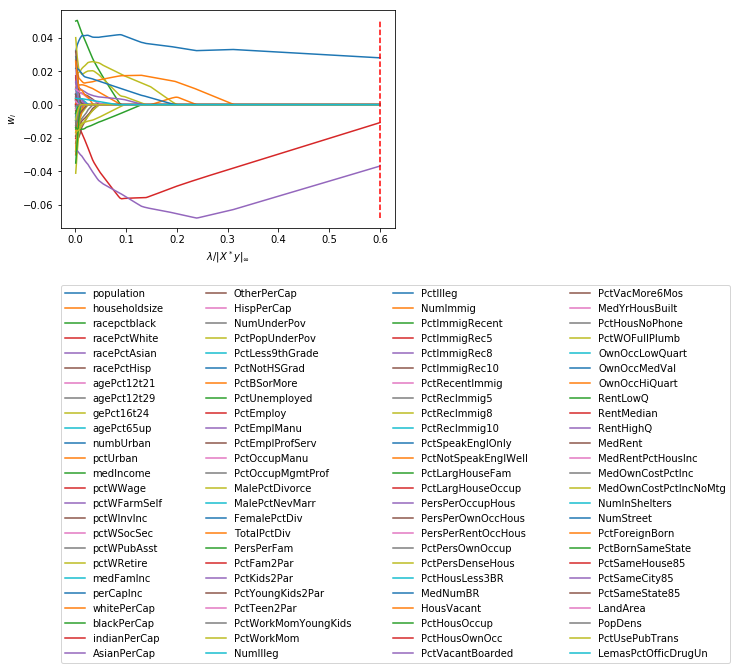

In [31]:
plt.clf
for i in np.arange(0,p):
    plt.plot(lambda_list/lmax, W[i,:], label=data.columns[i])
plt.plot( [lambda0/lmax,lambda0/lmax], [W.flatten().min(),W.flatten().max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda/|X^* y|_\infty$')
plt.ylabel('$w_i$')
plt.legend(bbox_to_anchor=(0., -2, 2, 0), loc=8,
       ncol=4, mode="expand", borderaxespad=0.)
plt.show()

## Avec Scikit-learn

In [32]:
n_lambdas = 300
Lambdas = np.logspace(-5, 1, n_lambdas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for l in Lambdas:
    lasso.set_params(alpha=l)
    lasso.fit(X_train_std, y_train_std)
    coefs.append(lasso.coef_)
    errors.append(metrics.mean_squared_error(lasso.predict(X_test_std), y_test_std))
    
print('MSE min :', round(min(errors), 4))

MSE min : 0.0184


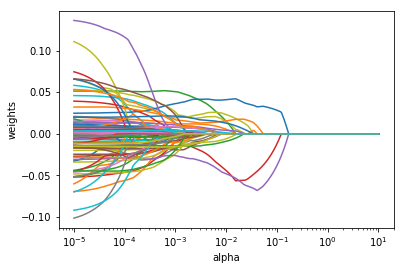

In [33]:
ax = plt.gca()

ax.plot(Lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

Comme on peut le voir, le lasso permet de supprimer des variables en mettant leur poids à zéro. C'est le cas si deux variables sont corrélées. L'une sera sélectionnée par le Lasso, l'autre supprimée. C'est aussi son avantage par rapport à une régression ridge qui ne fera pas de sélection de variables.

On peut observer maintenant le comportement de l'erreur.


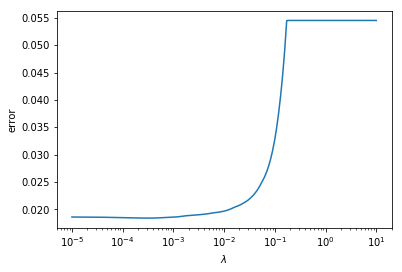

In [34]:
ax = plt.gca()

ax.plot(Lambdas, errors)
ax.set_xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.axis('tight')
plt.show()

Zoom :

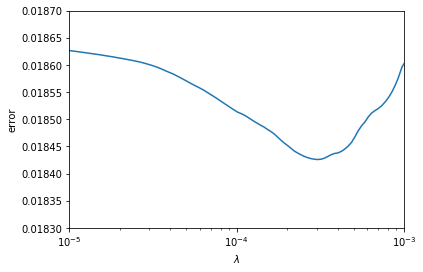

In [35]:
ax = plt.gca()

ax.plot(Lambdas, errors)
ax.set_xscale('log')
plt.ylim(0.0183, 0.0187)
plt.xlim(1e-5, 1e-3)
plt.xlabel('$\lambda$')
plt.ylabel('error')
#plt.axis('tight')
plt.show()

In [36]:
min(errors)

0.018426004954038053

La MSE est sensiblement la même, nous n'avons pas gagné beaucoup avec le lasso.

Essayons désormais de trouver le meilleur 𝜆 avec une validation croisée :

In [37]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha': Lambdas}

# Choisir un score à optimiser, ici la MSE
score = 'neg_mean_squared_error'

# Créer une régression Lasso avec recherche d'hyperparamètre par validation croisée
reg = model_selection.GridSearchCV(linear_model.Lasso(fit_intercept=False), # régression Lasso
                                    param_grid, # hyperparamètres à tester
                                    cv=kf, # folds pour la validation croisée
                                    scoring=score # score à optimiser
                                    )

# Optimiser la régression sur le jeu d'entraînement
reg.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(reg.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(reg.cv_results_['mean_test_score'], # score moyen
                                reg.cv_results_['std_test_score'], # écart-type du score
                                reg.cv_results_['params'] # valeur de l'hyperparamètre
                                ):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
                                                mean, # score moyen
                                                std * 2, # barre d'erreur
                                                params # hyperparamètre
                                                ))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 0.00812267350047972}
Résultats de la validation croisée :
	neg_mean_squared_error = -0.087 (+/-0.013) for {'alpha': 1e-05}
	neg_mean_squared_error = -0.087 (+/-0.013) for {'alpha': 1.0472898382363595e-05}
	neg_mean_squared_error = -0.087 (+/-0.013) for {'alpha': 1.096816005273138e-05}
	neg_mean_squared_error = -0.087 (+/-0.013) for {'alpha': 1.1486842567375548e-05}
	neg_mean_squared_error = -0.087 (+/-0.013) for {'alpha': 1.2030053494233242e-05}
	neg_mean_squared_error = -0.087 (+/-0.012) for {'alpha': 1.2598952777950285e-05}
	neg_mean_squared_error = -0.087 (+/-0.012) for {'alpha': 1.3194755216767059e-05}
	neg_mean_squared_error = -0.087 (+/-0.012) for {'alpha': 1.3818733056536336e-05}
	neg_mean_squared_error = -0.087 (+/-0.012) for {'alpha': 1.4472218707411344e-05}
	neg_mean_squared_error = -0.087 (+/-0.012) for {'alpha': 1.5156607589006043e-05}
	neg_mean_squared_error = -0.087 (+/-0.012) for {'alpha': 1.5873361110102

Avec un $\lambda$ à 0.008, on obtient une MSE à 0.078. C'est donc le meilleur modèle pour ce jeu de test.